# TASK # 01:
#### Apply multiple regression to another dataset of your own choice. Try for different train-test split and random states.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('/content/delivery.csv')

In [3]:
dataset.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
dataset.dropna(axis=0, inplace=True)

In [5]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [6]:
X.shape

(883, 8)

In [7]:
Y.shape

(883,)

In [8]:
X.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0
4,412,19.03,Clear,Low,Morning,Bike,16,5.0


In [9]:
Y.head()

,Delivery_Time_min
0,43
1,84
2,59
3,37
4,68


In [10]:
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

In [11]:
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_columns)
], remainder='passthrough')
X=np.array(column_transformer.fit_transform(X))

## Train Size: 70%<br>Test Size: 30%<br>Random State: 42

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
X_train.shape

(618, 19)

In [13]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = multi_regressor.predict(X_test)

In [15]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-4.85428954e+00  3.28696663e+00 -3.58271716e-01  3.92716049e+00
 -2.00156586e+00  6.77699307e+00 -6.06980444e+00 -7.07188635e-01
 -9.13559975e-02  1.02728540e+00 -1.60731110e-01 -7.75198290e-01
 -1.23193717e-01  9.57071564e-01 -8.33877847e-01 -3.38349696e-05
  2.96239484e+00  9.23987564e-01 -6.06084471e-01]
17.05846043617629


In [16]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.8322720179933255


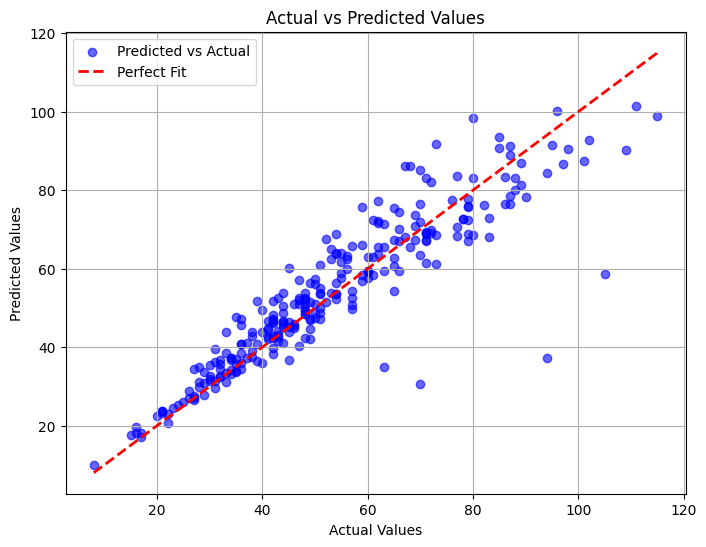

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()


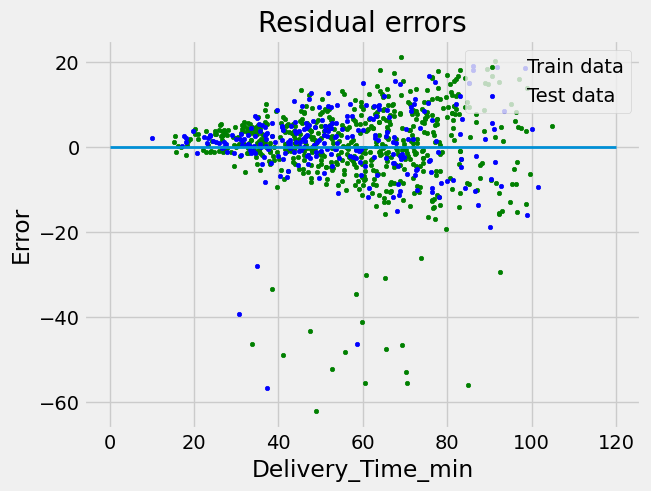

In [18]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 120, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Delivery_Time_min")
plt.ylabel("Error")
plt.show()

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.492774761827528
MSE: 70.88602257217629
RMSE: 8.41938374064137


## Train Size: 80%<br>Test Size: 20%<br>Random State: 42

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)
X_train.shape

(706, 19)

In [21]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = multi_regressor.predict(X_test)

In [23]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-5.01673661e+00  3.56553635e+00 -2.48207205e-01  4.19212926e+00
 -2.49272180e+00  6.47478499e+00 -6.05093334e+00 -4.23851655e-01
  1.33075720e-01  1.15953728e+00 -1.18149885e-01 -1.17446311e+00
 -4.02586976e-02  8.35736890e-01 -7.95478193e-01 -1.63650901e-04
  2.97959204e+00  9.26079275e-01 -6.11655983e-01]
16.896244372790107


In [24]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.8324092509049861


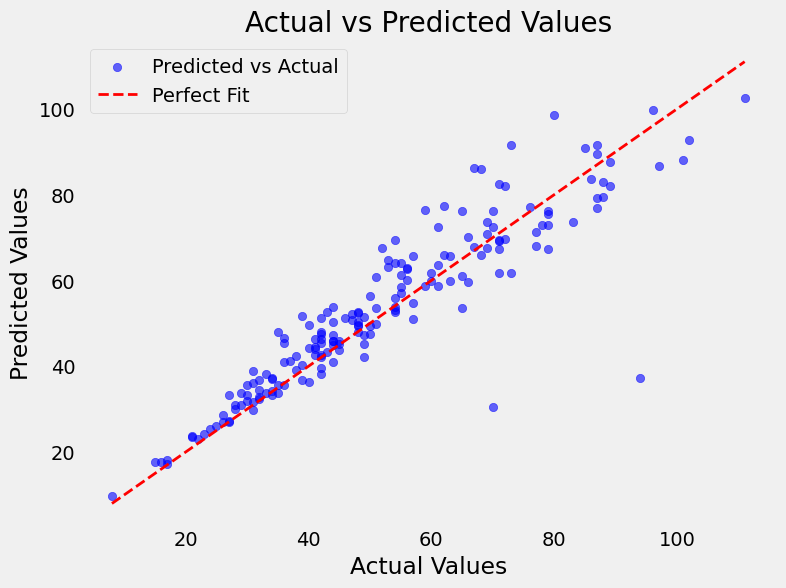

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()


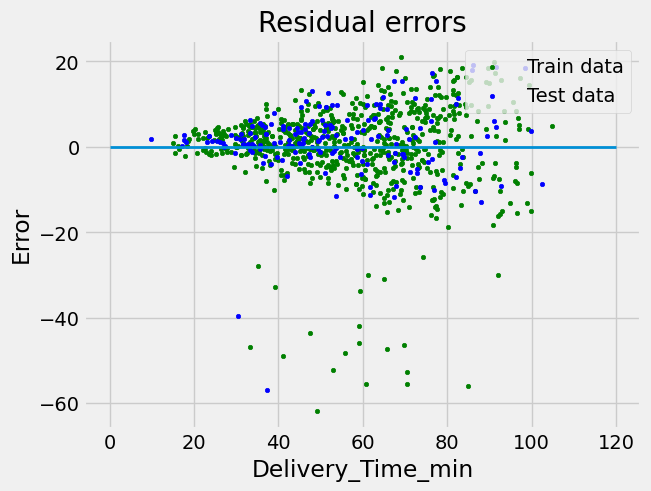

In [26]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 120, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Delivery_Time_min")
plt.ylabel("Error")
plt.show()

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.320976568083382
MSE: 68.49771835894349
RMSE: 8.27633483849847
